In [ ]:
#predict = cnn(imageclassifier.h5) + haarcascade

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
def predict(pic):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    new_model = load_model(os.path.join('saved_model', 'imageclassifier.h5'))

    image = cv2.imread(pic)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    resize = tf.image.resize(image, (256, 256))
    with tf.device('/cpu:0'):  # Ensure prediction happens on CPU
        yhat_new = new_model.predict(np.expand_dims(resize / 255, 0), verbose=0)

    if yhat_new > 0.5:
        print(f'Predicted class is Signature\n')
    else:
        print(f'Predicted class is Face Image\n')

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

    if len(faces) == 0:
        print("No face(s) detected")
    else:
        print(f"Detected face(s): {len(faces)} ")

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
predict('Sign 2.png')

In [ ]:
# import pickle

# def pickle_code(file_path):
#     with open(file_path, 'wb') as file:
#         pickle.dump(predict, file)

# pickle_code('predict_function.pkl')

pickle.dump(predict, open("new_app.pkl", "wb"))

In [ ]:
# import pickle
# with open('predict_function.pkl' , 'rb') as file:
#     model = pickle.load(file)

with open('new_app.pkl' , 'rb') as file:
    model = pickle.load(file) 

In [ ]:
type(model)

In [ ]:
print(dir(model))

In [ ]:
model('Passport size photo.jpg')

In [15]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

In [4]:
new_model = load_model(os.path.join('saved_model','imageclassifier.h5'))

In [5]:
new_model

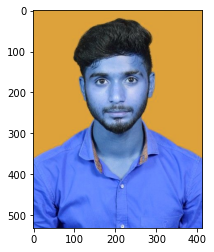

In [27]:
import matplotlib.pyplot as plt
img = cv2.imread('Test Face 2.jpg')
plt.imshow(img)

In [20]:
resize = tf.image.resize(img, (256,256))

In [23]:
yhat=new_model.predict(np.expand_dims(resize/255, 0),verbose=0)

In [24]:
if yhat > 0.5: 
    print(f'This is a Signature')
else:
    print(f'This is a Face Image')

This is a Face Image
